In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
import joblib

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dl a3/NTDOY.csv', index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5034 entries, 2003-11-19 to 2023-11-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5034 non-null   float64
 1   High       5034 non-null   float64
 2   Low        5034 non-null   float64
 3   Close      5034 non-null   float64
 4   Adj Close  5034 non-null   float64
 5   Volume     5034 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.3+ KB


**Analyse data**


In [ ]:
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-11-19,2.14,2.16,2.08,2.14,2.073791,156500
2003-11-20,2.10,2.13,2.10,2.10,2.035028,333500
2003-11-21,2.11,2.11,2.05,2.11,2.044719,208000
2003-11-24,2.13,2.13,2.06,2.13,2.064100,288500
2003-11-25,2.16,2.16,2.11,2.16,2.093172,193500


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-13,11.51,11.64,11.51,11.64,11.64,4914900
2023-11-14,11.77,11.80,11.64,11.76,11.76,1021700
2023-11-15,11.57,11.70,11.51,11.52,11.52,959500
2023-11-16,11.52,11.69,11.52,11.67,11.67,544800
2023-11-17,11.54,11.71,11.51,11.53,11.53,612600


In [ ]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,6.996468,7.059849,6.930555,6.998648,6.992668,1.416198e+06
std,3.742591,3.776444,3.705516,3.742115,3.748836,2.512411e+06
min,2.060000,2.110000,1.340000,2.100000,2.035028,0.000000e+00
25%,3.341000,3.372500,3.310000,3.340000,3.336089,3.621250e+05
50%,6.669000,6.745000,6.602000,6.670000,6.670000,8.655500e+05
75%,10.114500,10.233000,10.031500,10.120000,10.120000,1.710250e+06
max,16.309999,16.510000,16.309999,16.430000,16.430000,6.700900e+07


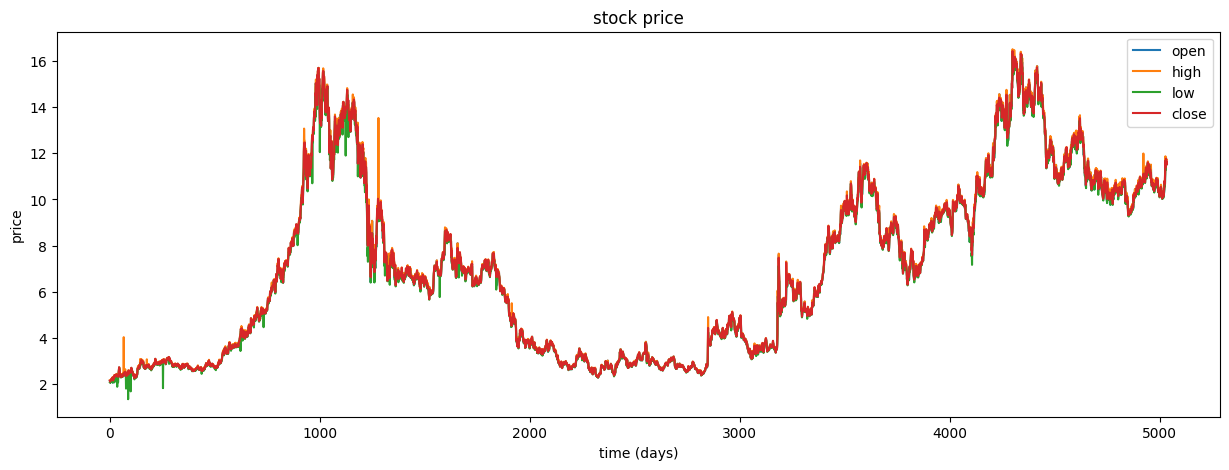

In [ ]:
# visualise data
plt.figure(figsize=(15, 5));
plt.plot(df.Open.values, label='open')
plt.plot(df.High.values,  label='high')
plt.plot(df.Low.values, label='low')
plt.plot(df.Close.values, label='close')
plt.title('stock price')
plt.xlabel('time (days)')
plt.ylabel('price')
plt.legend(loc='best')

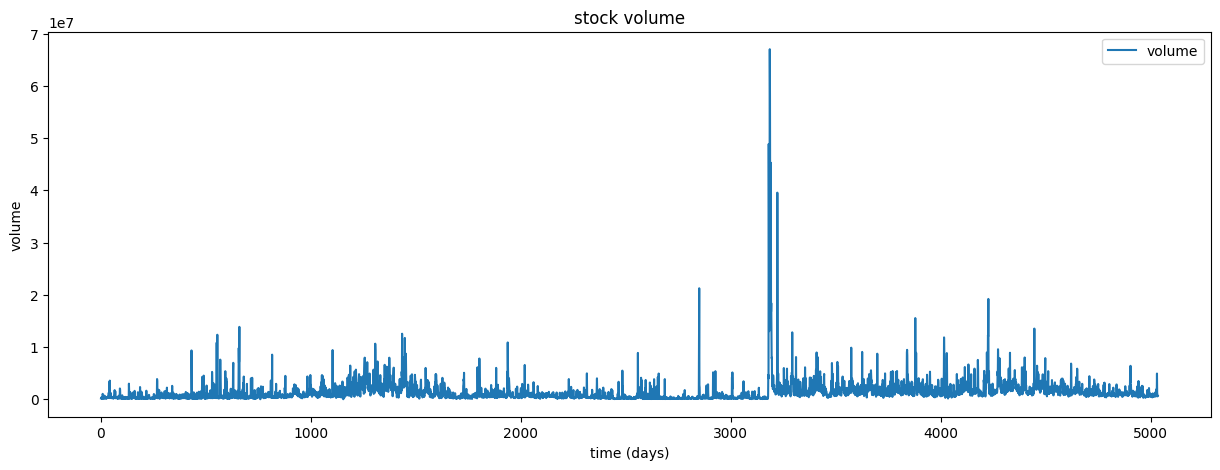

In [ ]:
plt.figure(figsize=(15, 5));
plt.plot(df.Volume.values, label='volume')
plt.title('stock volume')
plt.xlabel('time (days)')
plt.ylabel('volume')
plt.legend(loc='best');

What is MA:

 A moving average (MA), a popular technical indicator, smoothes price movements by removing the noise from erratic short-term price swings. There are numerous ways to build moving averages, and the number of days used for the averaging interval might vary. The average is calculated over a predetermined time frame, such as weeks, days, hours, minutes.

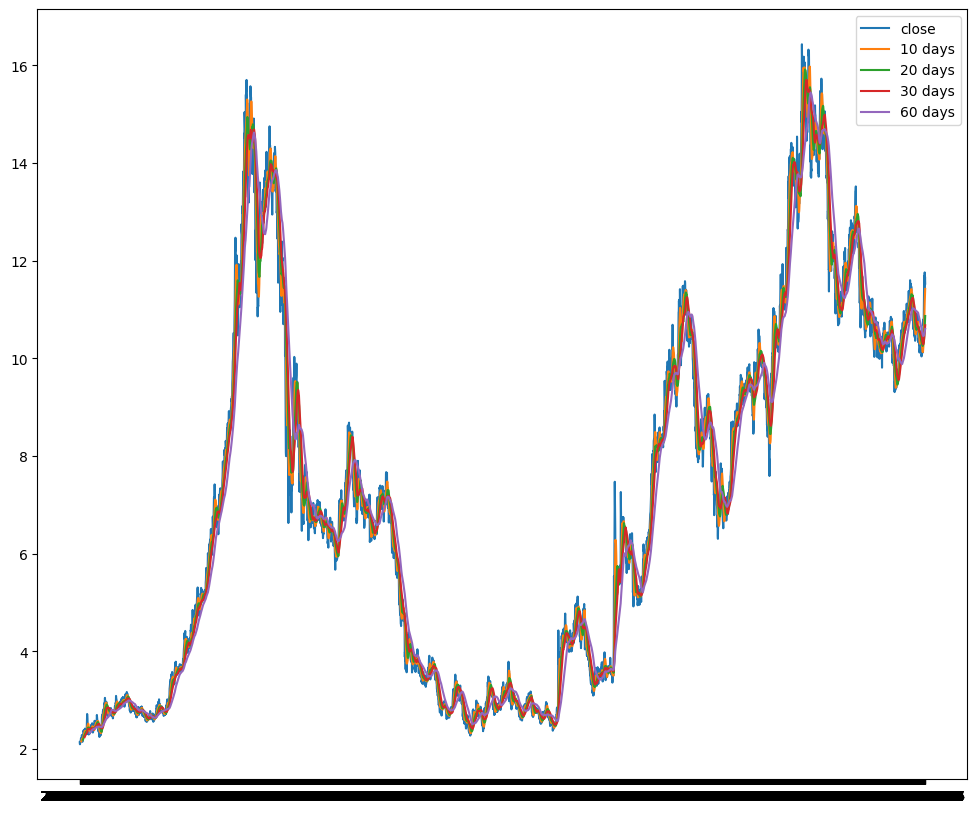

In [ ]:
ma_days = [10,20,30, 60]

for MA in ma_days:
    column_name = f"MA in {MA} days"
    df[column_name] = df['Close'].rolling(MA).mean()

plt.figure(figsize=(12,10))

plt.plot(df['Close'],label='close')
plt.plot(df['MA in 10 days'],label= '10 days')
plt.plot(df['MA in 20 days'],label= '20 days')
plt.plot(df['MA in 30 days'],label= '30 days')
plt.plot(df['MA in 60 days'],label= '60 days')
plt.legend()
plt.show()

In [ ]:
# Normalise Data
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# scale on only one column('close')
scaled = scaler.fit_transform(df.filter(['Close']))
#scaled df with 'close column'
df2=pd.DataFrame(scaled, columns=['close'])

In [ ]:
df2.describe()

,close
count,5034.000000
mean,0.341846
std,0.261139
min,0.000000
25%,0.086532
50%,0.318911
75%,0.559665
max,1.000000


In [ ]:
# Split data to training and test set 0.8,0.2
new_dataset_length = int(np.ceil( len(df2.filter(['close']).values) * .8 ))
print('Training set size: ',new_dataset_length, ' \nTest set size: ',len(df.Close) - new_dataset_length)

Training set size:  4028  
Test set size:  1006


In [ ]:
# Create the training data set with 20 time steps

train = scaled[0:int(new_dataset_length), :]

time_step = 20

X_train = []
y_train = []

for i in range(time_step, len(train)):
    X_train.append(train[i-time_step:i, 0])
    y_train.append(train[i, 0])
    if i<= (time_step+1):
        print(X_train)
        print(y_train)
        print()

[array([0.00279135, 0.        , 0.00069784, 0.00209351, 0.00418702,
       0.00488486, 0.00488486, 0.00837404, 0.00837404, 0.00488486,
       0.00628053, 0.00837404, 0.01186322, 0.0132589 , 0.00628053,
       0.00558269, 0.00348918, 0.01046755, 0.00976971, 0.01256106])]
[0.012561060711793415]

[array([0.00279135, 0.        , 0.00069784, 0.00209351, 0.00418702,
       0.00488486, 0.00488486, 0.00837404, 0.00837404, 0.00488486,
       0.00628053, 0.00837404, 0.01186322, 0.0132589 , 0.00628053,
       0.00558269, 0.00348918, 0.01046755, 0.00976971, 0.01256106]), array([0.        , 0.00069784, 0.00209351, 0.00418702, 0.00488486,
       0.00488486, 0.00837404, 0.00837404, 0.00488486, 0.00628053,
       0.00837404, 0.01186322, 0.0132589 , 0.00628053, 0.00558269,
       0.00348918, 0.01046755, 0.00976971, 0.01256106, 0.01256106])]
[0.012561060711793415, 0.017445917655268678]



In [ ]:
# Converting X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshape  X_train
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# Test dataset
test = scaled[new_dataset_length-time_step:, :]
y_test =  np.array(scaler.inverse_transform(df2))[new_dataset_length:, :]
X_test = []
for i in range(time_step, len(test)):
    X_test.append(test[i-time_step:i, 0])
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
# Creat RNN model --- LSTM
RNN1 = tf.keras.models.Sequential()
# First and second LSTM Layer
RNN1.add(tf.keras.layers.LSTM(units=130, return_sequences=True, input_shape=(X_train.shape[1],1)))
RNN1.add(tf.keras.layers.LSTM(units=65, return_sequences=False))
# Connection
RNN1.add(tf.keras.layers.Dense(units=30))
# Output layer
RNN1.add(tf.keras.layers.Dense(units=1))
# Compiling RNN
RNN1.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])


In [ ]:
# Fitting Model on The Train and Validation Dataset
Model_1 = RNN1.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
126/126 [==============================] - 15s 73ms/step - loss: 0.0031 - accuracy: 0.0000e+00 - val_loss: 124.6354 - val_accuracy: 0.0000e+00
Epoch 2/10
126/126 [==============================] - 5s 39ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 124.5873 - val_accuracy: 0.0000e+00
Epoch 3/10
126/126 [==============================] - 6s 50ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 123.6091 - val_accuracy: 0.0000e+00
Epoch 4/10
126/126 [==============================] - 7s 54ms/step - loss: 9.6429e-04 - accuracy: 0.0000e+00 - val_loss: 125.0302 - val_accuracy: 0.0000e+00
Epoch 5/10
126/126 [==============================] - 5s 38ms/step - loss: 8.6444e-04 - accuracy: 0.0000e+00 - val_loss: 125.1155 - val_accuracy: 0.0000e+00
Epoch 6/10
126/126 [==============================] - 7s 53ms/step - loss: 6.8949e-04 - accuracy: 0.0000e+00 - val_loss: 126.9210 - val_accuracy: 0.0000e+00
Epoch 7/10
126/126 [==============================] - 6s 49ms/step - 

In [ ]:
# Geting The Model Predicted Price Values
predictions1 = RNN1.predict(X_test)
# Converting scaled number to actual number
predictions1 = scaler.inverse_transform(predictions1)

32/32 [==============================] - 1s 13ms/step


In [ ]:
# geting the score and error
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions1)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions1)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions1))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions1)}')

Mean Absolute Error: 0.22685094266802747
Mean Squared Error: 0.09492819081983131
Root Mean Squared Error: 0.30810418825428404
R2_Score: 0.9709301501383553


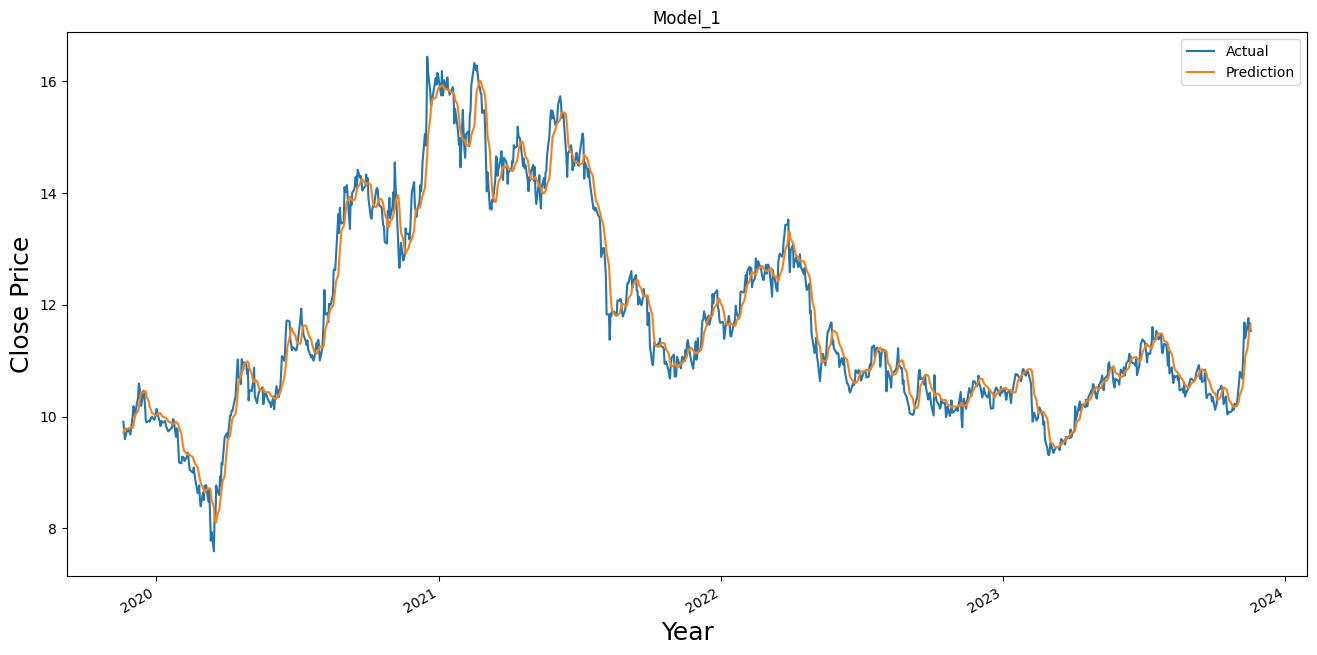

In [ ]:
import matplotlib.dates as mdates
df.index = pd.to_datetime(df.index)
# Create train and val data from DataFrame
train = df['Close'][:new_dataset_length]
valid = df['Close'][new_dataset_length:]
valid = valid.to_frame()
valid['Predictions1'] = predictions1

# Visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model_1')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(valid[['Close', 'Predictions1']])
plt.legend(['Actual', 'Prediction'], loc='best')

# Display by year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.show()


In [ ]:
# Creat RNN model------GRU
RNN2 = tf.keras.models.Sequential()
# First GRU Layer
RNN2.add(tf.keras.layers.GRU(units=130, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
# Second GRU Layer
RNN2.add(tf.keras.layers.GRU(units=65, return_sequences=False, activation='tanh'))
# Connection
RNN2.add(tf.keras.layers.Dense(units=30))
# The Output layer
RNN2.add(tf.keras.layers.Dense(units=1))
# Compiling The RNN
RNN2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='mean_squared_error', metrics=['accuracy'])
# Fitting Model on The Train and Validation Dataset
Model_2 = RNN2.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
126/126 [==============================] - 12s 58ms/step - loss: 0.0092 - accuracy: 0.0000e+00 - val_loss: 124.3766 - val_accuracy: 0.0000e+00
Epoch 2/10
126/126 [==============================] - 4s 35ms/step - loss: 3.2465e-04 - accuracy: 0.0000e+00 - val_loss: 124.3559 - val_accuracy: 0.0000e+00
Epoch 3/10
126/126 [==============================] - 5s 40ms/step - loss: 3.2274e-04 - accuracy: 0.0000e+00 - val_loss: 124.2882 - val_accuracy: 0.0000e+00
Epoch 4/10
126/126 [==============================] - 7s 54ms/step - loss: 3.2224e-04 - accuracy: 0.0000e+00 - val_loss: 124.2351 - val_accuracy: 0.0000e+00
Epoch 5/10
126/126 [==============================] - 4s 34ms/step - loss: 3.1947e-04 - accuracy: 0.0000e+00 - val_loss: 124.3108 - val_accuracy: 0.0000e+00
Epoch 6/10
126/126 [==============================] - 4s 34ms/step - loss: 3.1706e-04 - accuracy: 0.0000e+00 - val_loss: 124.2771 - val_accuracy: 0.0000e+00
Epoch 7/10
126/126 [==============================] - 8s 60ms

In [ ]:
# Prediction
predictions2 = RNN2.predict(X_test)
# Converting scaled number to actual number
predictions2 = scaler.inverse_transform(predictions2)

32/32 [==============================] - 2s 21ms/step


In [ ]:
# geting the score and error
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions2)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions2)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions2))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions2)}')

Mean Absolute Error: 0.22771109317398827
Mean Squared Error: 0.09572812792798982
Root Mean Squared Error: 0.3093996249642036
R2_Score: 0.970685185482102


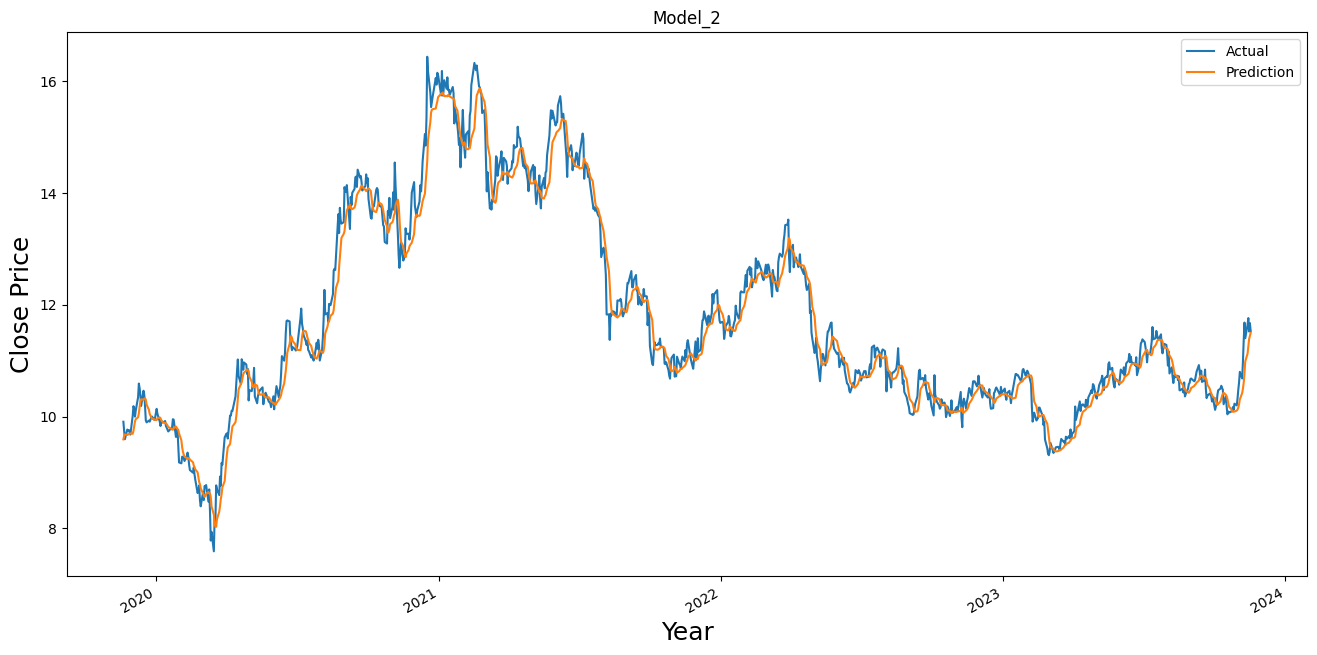

In [ ]:
# Create train and val data from DataFrame
train = df['Close'][:new_dataset_length]
valid = df['Close'][new_dataset_length:]
valid = valid.to_frame()
valid['Predictions2'] = predictions2

# Visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model_2')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(valid[['Close', 'Predictions2']])
plt.legend(['Actual', 'Prediction'], loc='best')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.show()


In [ ]:
# Creat RNN (LSTM+GRU)
RNN3 = tf.keras.models.Sequential()
# First Layer of LSTM
RNN3.add(tf.keras.layers.LSTM(units=130, return_sequences=True, input_shape=(X_train.shape[1],1)))
# Second Layer of GRU
RNN3.add(tf.keras.layers.GRU(units=65, return_sequences=False, activation='tanh'))
# Connection
RNN3.add(tf.keras.layers.Dense(units=30))
# Output layer
RNN3.add(tf.keras.layers.Dense(units=1))
# Compiling The RNN
RNN3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='mean_squared_error', metrics=['accuracy'])
# Fitting Model on The Train and Validation Dataset
Model_3 = RNN3.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
126/126 [==============================] - 10s 46ms/step - loss: 0.0050 - accuracy: 0.0000e+00 - val_loss: 124.1288 - val_accuracy: 0.0000e+00
Epoch 2/10
126/126 [==============================] - 7s 58ms/step - loss: 4.8741e-04 - accuracy: 0.0000e+00 - val_loss: 124.3923 - val_accuracy: 0.0000e+00
Epoch 3/10
126/126 [==============================] - 6s 47ms/step - loss: 4.7028e-04 - accuracy: 0.0000e+00 - val_loss: 124.4399 - val_accuracy: 0.0000e+00
Epoch 4/10
126/126 [==============================] - 5s 41ms/step - loss: 4.8128e-04 - accuracy: 0.0000e+00 - val_loss: 124.3661 - val_accuracy: 0.0000e+00
Epoch 5/10
126/126 [==============================] - 8s 68ms/step - loss: 4.6314e-04 - accuracy: 0.0000e+00 - val_loss: 124.3033 - val_accuracy: 0.0000e+00
Epoch 6/10
126/126 [==============================] - 5s 42ms/step - loss: 4.5587e-04 - accuracy: 0.0000e+00 - val_loss: 124.5298 - val_accuracy: 0.0000e+00
Epoch 7/10
126/126 [==============================] - 6s 46ms

In [ ]:
# Geting The Models Predicted Price Values
predictions3 = RNN3.predict(X_test)
# Converting scaled number to actual number
predictions3 = scaler.inverse_transform(predictions3)
# geting the score and error
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions3)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions3)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions3))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions3)}')

32/32 [==============================] - 2s 23ms/step
Mean Absolute Error: 0.26984007988148984
Mean Squared Error: 0.1328060274043444
Root Mean Squared Error: 0.36442561299165627
R2_Score: 0.9593308242364686


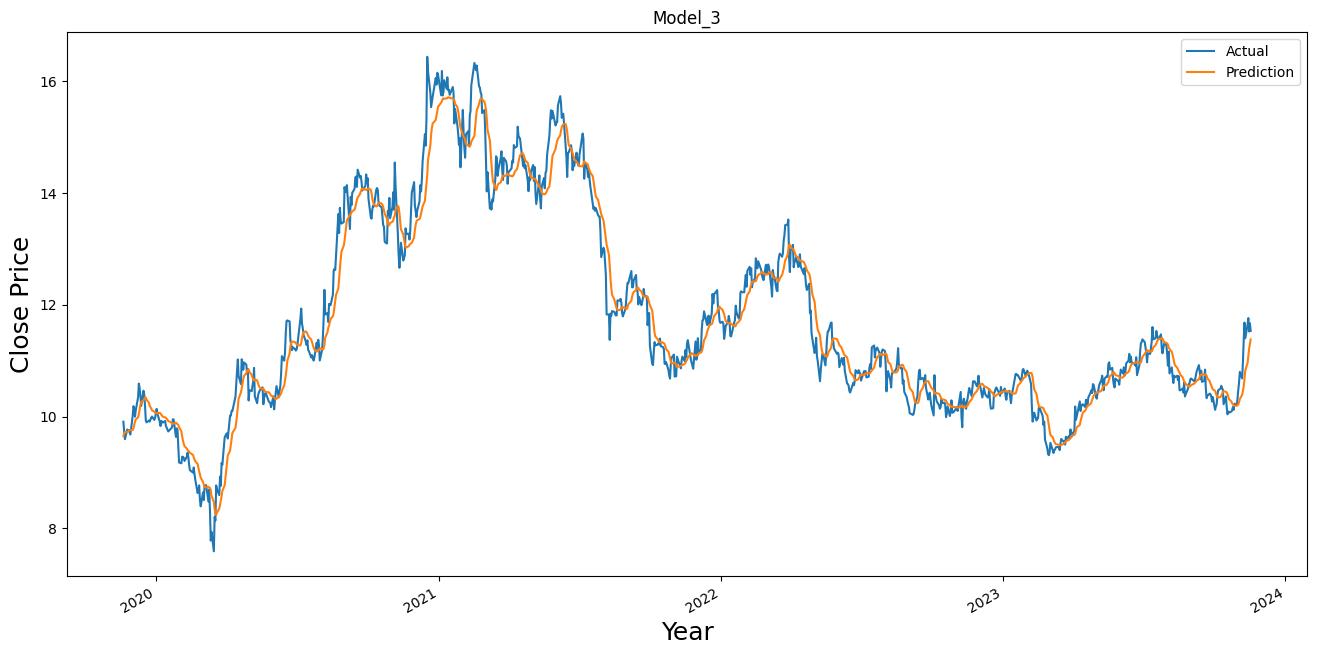

In [ ]:
# Create train and val data from DataFrame
train = df['Close'][:new_dataset_length]
valid = df['Close'][new_dataset_length:]
valid = valid.to_frame()
valid['Predictions3'] = predictions3

# Visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model_3')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(valid[['Close', 'Predictions3']])
plt.legend(['Actual', 'Prediction'], loc='best')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.show()